<h1> <font color='green'>The Sparks foundation </font> </h1>

### Workshop - Decision Trees

This workshop deals with understanding the working of decision trees.

### Author: Pratik Patil

### Task 4: Create the Decision Tree classifier and visualize it graphically. 


### Aim:The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 



<img src='https://thesparksfoundation.info/images/logo.png' width="300" height="400">

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}

<IPython.core.display.Javascript object>

In [3]:
# importing dataset
df = pd.read_csv("Iris.csv")

In [4]:
# lets look at our dataset
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# dropping id column as it is not needed.
df = df.drop(columns="Id")

In [6]:
# shape of our dataset
df.shape

(150, 5)

In [34]:
df.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

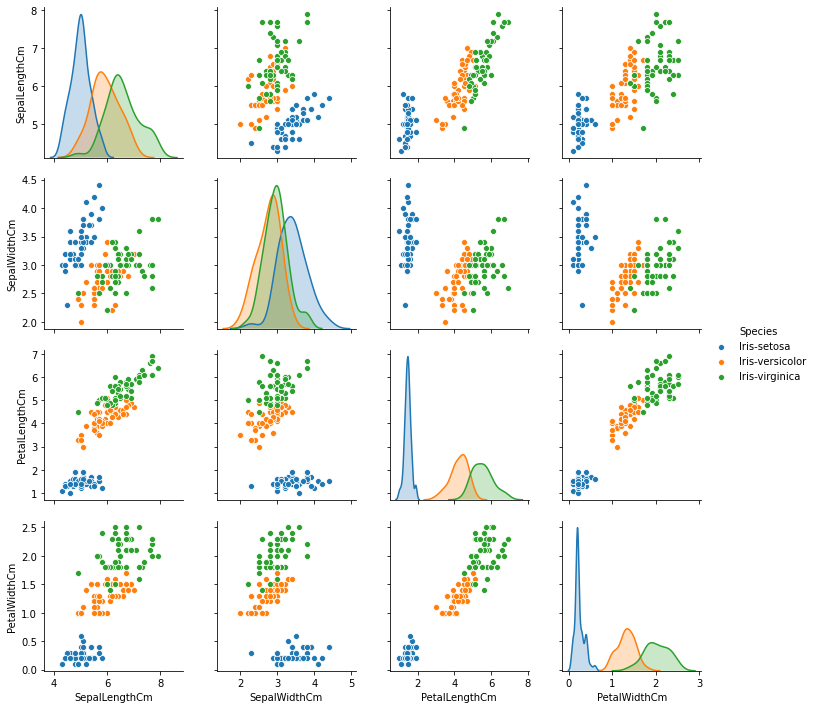

In [7]:
# pairplot showing relation among attributes with each other
sns.pairplot(data=df, hue="Species")

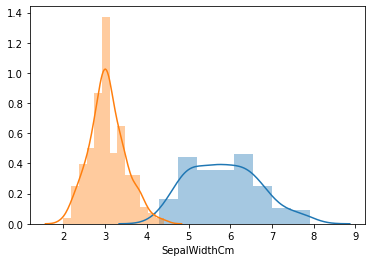

In [8]:

# distplot of sepal length and width
sns.distplot(df["SepalLengthCm"])
sns.distplot(df["SepalWidthCm"])

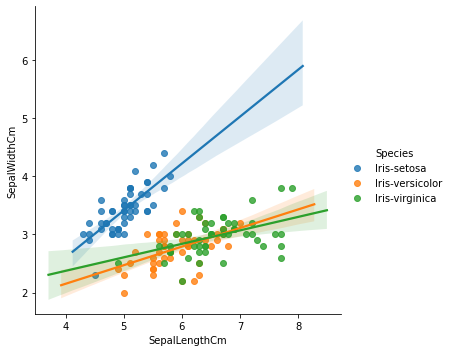

In [9]:
# lm plot for sepals
sns.lmplot(data=df, x="SepalLengthCm", y="SepalWidthCm", hue="Species")

In [10]:
iris_setosa = df.loc[df["Species"] == "Iris-setosa"];
iris_virginica = df.loc[df["Species"] == "Iris-virginica"];
iris_versicolor = df.loc[df["Species"] == "Iris-versicolor"];

In [11]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa['PetalLengthCm']))
#Median with an outlier
print(np.median(np.append(iris_setosa['PetalLengthCm'],50)));
print(np.median(iris_virginica['PetalLengthCm']))
print(np.median(iris_versicolor['PetalLengthCm']))


print("\nQuantiles:")
print(np.percentile(iris_setosa['PetalLengthCm'],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica['PetalLengthCm'],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor['PetalLengthCm'], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa['PetalLengthCm'],90))
print(np.percentile(iris_virginica['PetalLengthCm'],90))
print(np.percentile(iris_versicolor['PetalLengthCm'], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa['PetalLengthCm']))
print(robust.mad(iris_virginica['PetalLengthCm']))
print(robust.mad(iris_versicolor['PetalLengthCm']))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Feature selection

In [12]:
X = df.iloc[:,:-1].values
y = df.Species.values

In [13]:

# Encoding target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:

# printing target variable
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


### Now let us define the Decision Tree Algorithm

In [16]:
#fitting decisiontreeclassifier model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# making predictions from our classifier
y_pred = classifier.predict(X_test)
print(y_pred)

[1 2 0 0 1 1 2 2 1 1 1 1 2 0 1 2 1 1 0 2 0 0 2 2 0 2 2 2 2 0]


In [18]:
X_test[0]

array([6.2, 2.2, 4.5, 1.5])

In [19]:
X_test[3]

array([4.6, 3.4, 1.4, 0.3])

In [30]:
X_test[1]

array([7.7, 2.8, 6.7, 2. ])

In [21]:
new = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
new.head(8)

,Actual,Predicted
0,1,1
1,2,2
2,0,0
3,0,0
4,1,1
5,1,1
6,2,2
7,2,2


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.90      0.90      0.90        10
           2       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



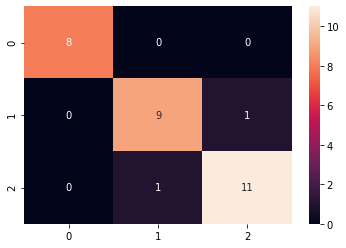

In [22]:

# Accuracy of our classification model
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(data = cm, annot=True)

report = classification_report(y_pred, y_test)
print(report)
# through classification report



### Let us visualize the Decision Tree to understand it better.



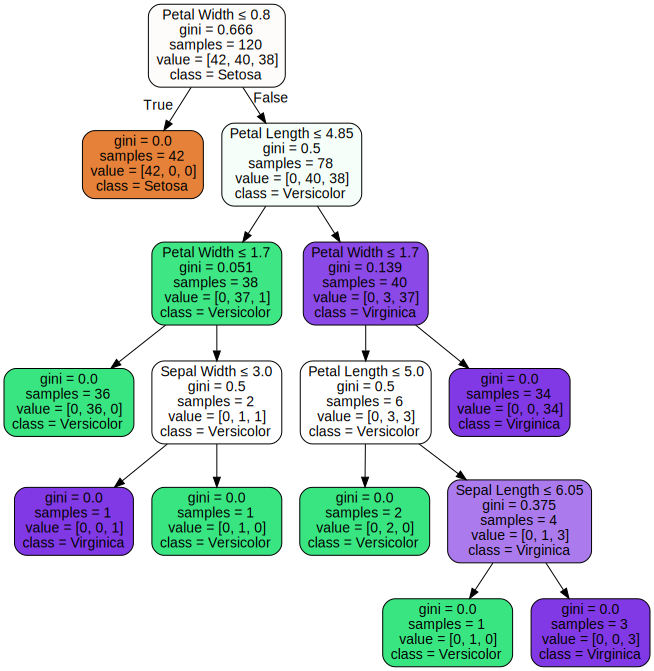

In [23]:

#Visualizing Decision Tree
import graphviz
from sklearn import tree
feature_name = ["Sepal Length","Sepal Width","Petal Length","Petal Width"]
class_name = ["Setosa","Versicolor","Virginica"]


d = tree.export_graphviz(classifier, feature_names = feature_name, class_names=class_name,filled =True,
                         rounded=True, special_characters=True)
dtree = graphviz.Source(d, format="png")
dtree

**You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.**

In [24]:
# taking input from the user
sepal_length = input("Sepal Length: ")
sepal_width = input("Sepal Width: ")
petal_length = input("Petal Length: ")
petal_width = input("Petal Width: ")

Sepal Length: 6
Sepal Width: 2
Petal Length: 4
Petal Width: 1


In [25]:
print("Class according to the input data:")
if (classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] == 0):
    print('Setosa')
if (classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] == 1):
    print('Versicolor')
if (classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] == 2):
    print('Virginica')

Class according to the input data:
Versicolor


In [26]:
# taking input from the user
sepal_length = input("Sepal Length: ")
sepal_width = input("Sepal Width: ")
petal_length = input("Petal Length: ")
petal_width = input("Petal Width: ")

Sepal Length: 4
Sepal Width: 3
Petal Length: 1
Petal Width: 0.3


In [27]:
print("Class according to the input data:")
if (classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] == 0):
    print('Setosa')
if (classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] == 1):
    print('Versicolor')
if (classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] == 2):
    print('Virginica')

Class according to the input data:
Setosa


In [32]:
# taking input from the user
sepal_length = input("Sepal Length: ")
sepal_width = input("Sepal Width: ")
petal_length = input("Petal Length: ")
petal_width = input("Petal Width: ")

Sepal Length: 7
Sepal Width: 2
Petal Length: 6
Petal Width: 2


In [33]:
print("Class according to the input data:")
if (classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] == 0):
    print('Setosa')
if (classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] == 1):
    print('Versicolor')
if (classifier.predict([[sepal_length, sepal_width, petal_length, petal_width]])[0] == 2):
    print('Virginica')

Class according to the input data:
Virginica


# referenece
--> https://github.com/purvitsharma/The-Sparks-Foundation/blob/Main/Task_6_colab.ipynb